In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [4]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(4)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.0,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.2,4,Down,0


In [17]:
df_ROS_forpatient = df_ROS[['성별','신장', '심혈관질환','체중','흡연여부','연령','직업','혈액형','재발여부']]

In [6]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


#### DDA 
- 1. 목표변수 설정 = 재발여부
- 2. 전처리(null값 확인) - .isnull().sum() 
        - 주의 사항: 대상 컬럼에 의한 레코드 삭제시 dataset의 양 고려

In [7]:
## 전처리 : 대상 컬럼 의한 레코드 삭제시 데이터셋 양 고려
df_ROS_forpatient = df_ROS_forpatient.dropna()
df_ROS_forpatient.isnull().sum()

성별       0
신장       0
심혈관질환    0
체중       0
흡연여부     0
연령       0
직업       0
혈액형      0
재발여부     0
dtype: int64

### 상관관계 확인

- 목표 변수 : '재발여부', 분모 언발란스 (연속형 : 정규화 확인, 범주형:밸런스 확인)
- 설명변수 :
    - '성별' : 성별에 따라서 남성의 재발율이 더 높은 것 같다.
    - '신장' : 목표 변수 대변 분포 변화 적다.
    - '심혈관질환 : 질환이 있는 환자는 없는 환자보다 재발율이 상대적으로 더 높다.
    - '체중' : 몸무게 차이에 따라 분포 변화 영향 있다.
    - '흡연여부' : 흡연자는 재발율이 상대적으로 높다.
    - '연령' : 상대적으로 나이 많으면 발생율이 높은 것으로 보인다.
    - '직업' : 건설업/수산업자 분들에 수치가 높다.
    - '혈액형' : 차이 여부 확인 필요(확증 데이터 분석)하다.

<Axes: xlabel='재발여부', ylabel='count'>

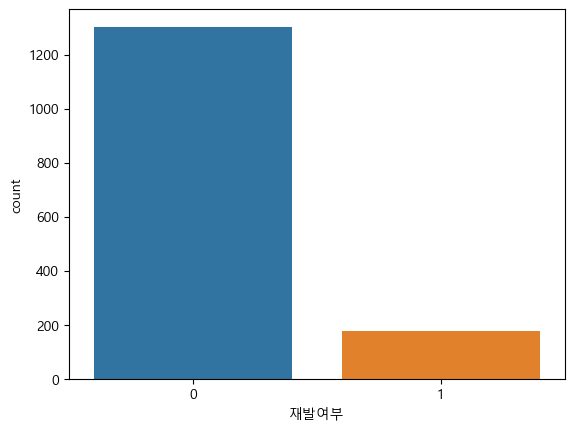

In [8]:
### 데이터 타입과 분포
## 목표 변수
sns.countplot(data=df_ROS_forpatient, x='재발여부') #범주형

In [9]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


In [10]:
#object 변환 대상 : 성별, 심혈관질환, 흡연여부
# df_ROS_forpatient['심혈관질환'].value_counts()
df_ROS_forpatient[['성별','심혈관질환','흡연여부','재발여부']]= df_ROS_forpatient[['성별','심혈관질환','흡연여부','재발여부']].astype(object)
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   object 
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   object 
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   object 
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 115.5+ KB


In [11]:
# 이럴때 머신러닝은 채우고 통계는 삭제 
df_ROS_forpatient = df_ROS_forpatient.dropna()

In [12]:
df_ROS_forpatient.isnull().sum()

성별       0
신장       0
심혈관질환    0
체중       0
흡연여부     0
연령       0
직업       0
혈액형      0
재발여부     0
dtype: int64

In [13]:
forpatient_list = df_ROS_forpatient.describe().columns.to_list() #컬럼에 네임 값만 가져오기
forpatient_list

['신장', '체중', '연령']

## x : 연속형 / y : 범주형

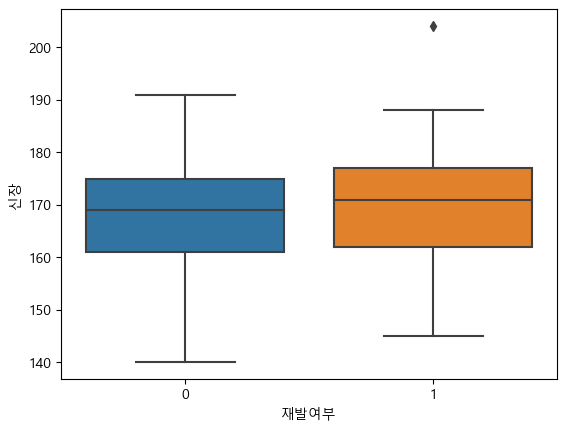

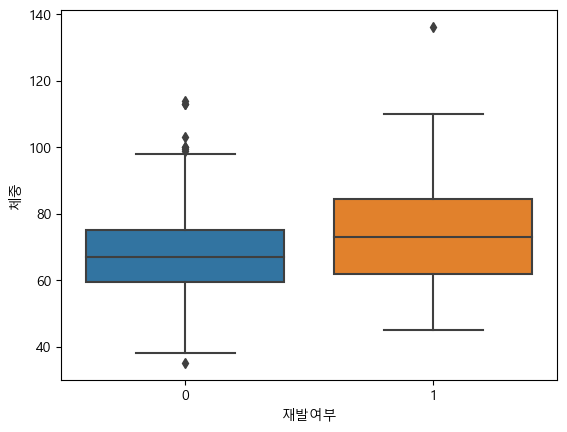

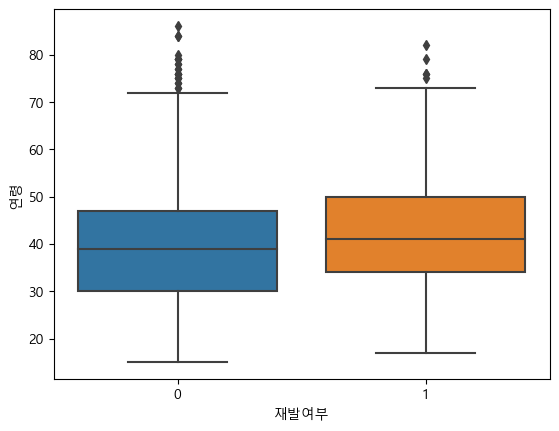

In [14]:
for item in forpatient_list :
    sns.boxplot(data=df_ROS_forpatient, x='재발여부', y=item)
    plt.show()

## x : 범주형 / y : 범주형 

In [15]:
# df_ROS_forpatient.drop(columns=['재발여부'])
forpatient_object_list = df_ROS_forpatient.describe(include=object).drop(columns=['재발여부']).columns.to_list()
forpatient_object_list 

['성별', '심혈관질환', '흡연여부', '직업', '혈액형']

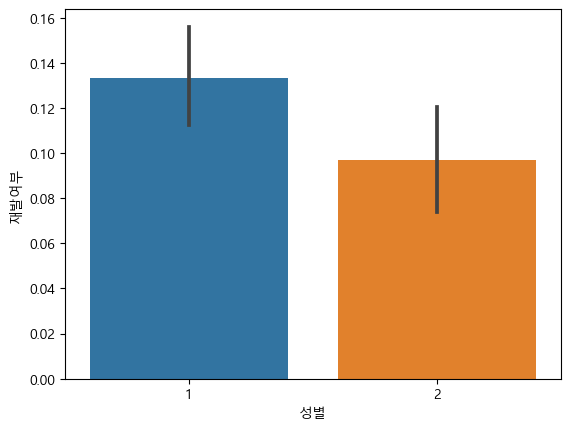

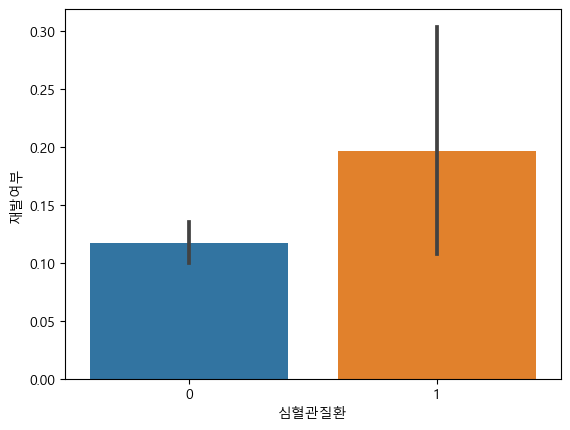

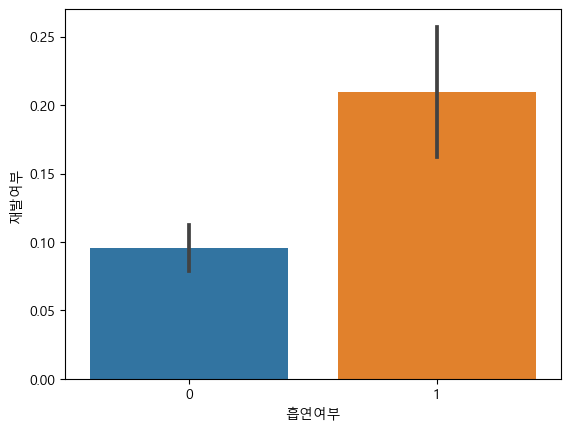

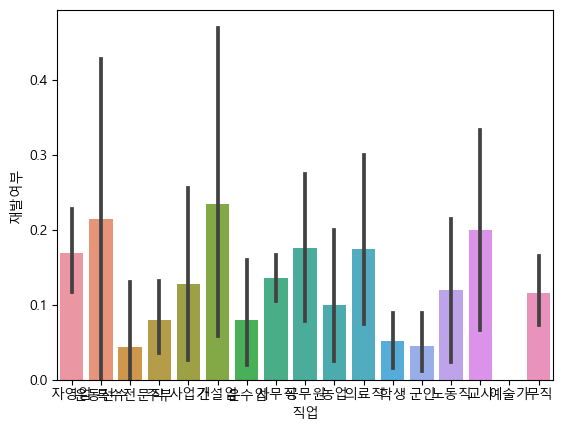

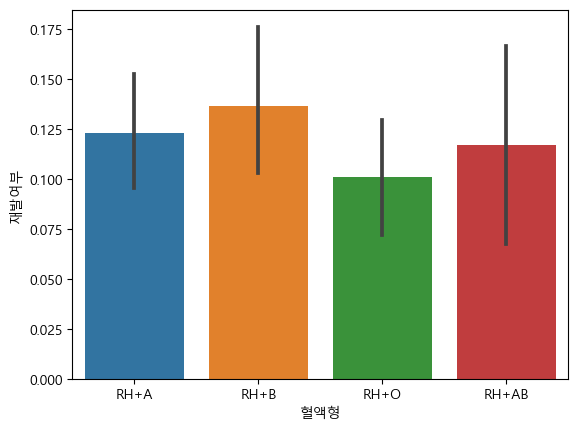

In [16]:
for item in forpatient_object_list :
    sns.barplot(data=df_ROS_forpatient, x=item, y='재발여부')
    plt.show()
# for item in forpatient_object_list :
#     sns.barplot(data=df_ROS_forpatient, x=item, y='재발여부', orient='h')
#     plt.show()